In [1]:
# packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint

In [21]:
# Figure style and fonts
fontsize= 12
ticksize = 14
figsize = (5, 4.5)
params = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params)

In [22]:
# Econ parameters
α = 1.0/3
ρ = 0.1111
δ = 0.1

In [23]:
# Defining the production function and the derivative of the production function
def f(k):
    return k**α

def f_prime(k):
    return  α*(k**(α -1))

In [24]:
# defining the steady states
k_star= ((δ+ρ)/α)**(1.0/(α - 1))
c_star = f(k_star)-δ*k_star

k_tilde_max = (δ)**(1/(α-1))
c_tilde_max = 0

In [25]:
# Creating the vector field
eps_ss = 0.1 # interval around the steady state
k_grid,c_grid = np.meshgrid(np.linspace(k_star*(1-eps_ss),k_star*(1+eps_ss),15),np.linspace(c_star*(1-eps_ss),c_star*(1+eps_ss),15))

dcdt = c_grid*(f_prime(k_grid)-(δ+ρ))
dkdt = f(k_grid)-δ*k_grid-c_grid

magnitude = np.sqrt(dcdt**2 + dkdt**2)

dcdt_normalized = dcdt/magnitude
dkdt_normalized = dkdt/magnitude

scale = 0.5 
Dc_scaled = dcdt_normalized  * scale
Dk_scaled = dkdt_normalized  * scale

C:\Users\mahdi\AppData\Local\Temp\ipykernel_7080\2439025020.py:10: RuntimeWarning: invalid value encountered in divide
  dcdt_normalized = dcdt/magnitude
C:\Users\mahdi\AppData\Local\Temp\ipykernel_7080\2439025020.py:11: RuntimeWarning: invalid value encountered in divide
  dkdt_normalized = dkdt/magnitude


In [26]:
# Closed form solution, shooting method
k_0_below = 1.0 # cpital below the steady state
k_0_above = 2.2 # capital above the steady state

def dg_dt(kc, t):
    return f(kc[0])-δ*kc[0] - kc[1], kc[1]*(f_prime(kc[0])- (δ+ρ)) #first one is \dot{k} and the second one is \dot{c}

ts = np.linspace(0, 32, 107)
kc0_below = [k_0_below,0.6954047] #Be careful the c(0) = 0.6954047 is only for these parameters, you have to change it if you change the parameters of the problem
kc0_above = [k_0_above,1.12937532] #Be careful the c(0) = 1.12937532 is only for these parameters, you have to change it if you change the parameters of the problem

sol_below = odeint(dg_dt, kc0_below, ts) # solving the ode for below the steady state
sol_above = odeint(dg_dt, kc0_above, ts) # solving the ode for above the steady state

c_path_shoot_below = sol_below[:,1]
k_path_shoot_below = sol_below[:,0]

c_path_shoot_above = sol_above[:,1]
k_path_shoot_above = sol_above[:,0]

In [27]:
# Generating the divergent solutions

## first divergent solutions
ts_1 = np.linspace(0, 13, 50)
kc0_1 = [1.8,1.0] 
sol_1 = odeint(dg_dt, kc0_1, ts_1)
c_path_shoot_1 = sol_1[:,1]
k_path_shoot_1 = sol_1[:,0]

## second divergent solution
ts_2 = np.linspace(0, 13, 50)
kc0_2 = [1.8, 0.9866] 
sol_2 = odeint(dg_dt, kc0_2, ts_2)
c_path_shoot_2 = sol_2[:,1]
k_path_shoot_2 = sol_2[:,0]

## third divergent solution
ts_3 = np.linspace(0, 13, 50)
kc0_3 = [2.2,1.132] 
sol_3 = odeint(dg_dt, kc0_3, ts_3)
c_path_shoot_3 = sol_3[:,1]
k_path_shoot_3 = sol_3[:,0]

## fourth divergent solution
ts_4 = np.linspace(0, 13, 50)
kc0_4 = [2.2, 1.1257] 
sol_4 = odeint(dg_dt, kc0_4, ts_4)
c_path_shoot_4 = sol_4[:,1]
k_path_shoot_4 = sol_4[:,0]



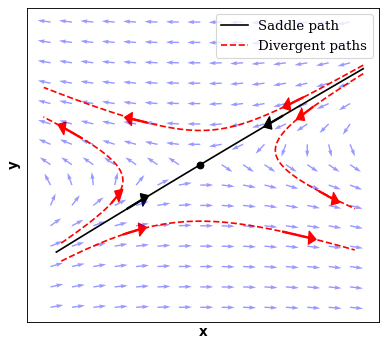

In [34]:
plt.ylabel(r"$\mathbf{y}$")
plt.xlabel(r"$\mathbf{x}$")
plt.plot(k_path_shoot_below[25:],c_path_shoot_below[25:], color = 'k', label = 'Saddle path')
plt.arrow(x=k_path_shoot_below[35], y=c_path_shoot_below[35], dx=k_path_shoot_below[30]-k_path_shoot_below[28], dy=c_path_shoot_below[30]-c_path_shoot_below[28], head_width=0.01, head_length=0.01, fc='black', ec='black')

plt.plot(k_path_shoot_above,c_path_shoot_above, color = 'k')
plt.arrow(x=k_path_shoot_above[10], y=c_path_shoot_above[10], dx=k_path_shoot_above[10]-k_path_shoot_above[8], dy=c_path_shoot_above[10]-c_path_shoot_above[8], head_width=0.01, head_length=0.01, fc='black', ec='black')

plt.plot(k_path_shoot_1[:35],c_path_shoot_1[:35], color = 'r', linestyle='--')
plt.arrow(x=k_path_shoot_1[10], y=c_path_shoot_1[10], dx=k_path_shoot_1[12]-k_path_shoot_1[10], dy=c_path_shoot_1[12]-c_path_shoot_1[10], head_width=0.01, head_length=0.01, fc='red', ec='red')
plt.arrow(x=k_path_shoot_1[30], y=c_path_shoot_1[30], dx=k_path_shoot_1[32]-k_path_shoot_1[30], dy=c_path_shoot_1[32]-c_path_shoot_1[30], head_width=0.01, head_length=0.01, fc='red', ec='red')

plt.plot(k_path_shoot_2[:31],c_path_shoot_2[:31],  color = 'r', linestyle='--', label = 'Divergent paths')
plt.arrow(x=k_path_shoot_2[7], y=c_path_shoot_2[7], dx=k_path_shoot_2[9]-k_path_shoot_2[7], dy=c_path_shoot_2[9]-c_path_shoot_2[7], head_width=0.01, head_length=0.01, fc='red', ec='red')
plt.arrow(x=k_path_shoot_2[25], y=c_path_shoot_2[25], dx=k_path_shoot_2[27]-k_path_shoot_2[25], dy=c_path_shoot_2[27]-c_path_shoot_2[25], head_width=0.01, head_length=0.01, fc='red', ec='red')


plt.plot(k_path_shoot_3[:45],c_path_shoot_3[:45],  color = 'r', linestyle='--')
plt.arrow(x=k_path_shoot_3[7], y=c_path_shoot_3[7], dx=k_path_shoot_3[9]-k_path_shoot_3[7], dy=c_path_shoot_3[9]-c_path_shoot_3[7], head_width=0.01, head_length=0.01, fc='red', ec='red')
plt.arrow(x=k_path_shoot_3[35], y=c_path_shoot_3[35], dx=k_path_shoot_3[35]-k_path_shoot_3[33], dy=c_path_shoot_3[35]-c_path_shoot_3[33], head_width=0.01, head_length=0.01, fc='red', ec='red')

plt.plot(k_path_shoot_4[:40],c_path_shoot_4[:40],  color = 'r', linestyle='--')
plt.arrow(x=k_path_shoot_4[7], y=c_path_shoot_4[7], dx=k_path_shoot_4[9]-k_path_shoot_4[7], dy=c_path_shoot_4[9]-c_path_shoot_4[7], head_width=0.01, head_length=0.01, fc='red', ec='red')
plt.arrow(x=k_path_shoot_4[35], y=c_path_shoot_4[35], dx=k_path_shoot_4[35]-k_path_shoot_4[33], dy=c_path_shoot_4[35]-c_path_shoot_4[33], head_width=0.01, head_length=0.01, fc='red', ec='red')

plt.scatter(k_star,c_star,color = 'k')
plt.quiver(k_grid,c_grid,Dk_scaled,Dc_scaled, color ='blue', alpha = 0.4)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.legend()
plt.tight_layout()

#plt.savefig('saddle_path.pdf')
